In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
plt.rcParams['axes.unicode_minus'] = False	#显示负号

In [3]:
df = pd.read_excel("D:/泰迪培训/python数据分析/商品销售数据.xlsx")
df.head()

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape 10,April,CBD店,2.5
1,Safety 8,August,社区店,10.0
2,Safety 2,February,社区店,10.0
3,Safety 8,November,社区店,10.0
4,Tape 10,October,社区店,2.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   商品代号     1326 non-null   object 
 1   销售月份     1326 non-null   object 
 2   销售点类型    1326 non-null   object 
 3   销售额（万元）  1326 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.6+ KB


In [5]:
#检测缺失值
df.isnull().sum()


商品代号       0
销售月份       0
销售点类型      0
销售额（万元）    0
dtype: int64

<AxesSubplot:xlabel='销售额（万元）'>

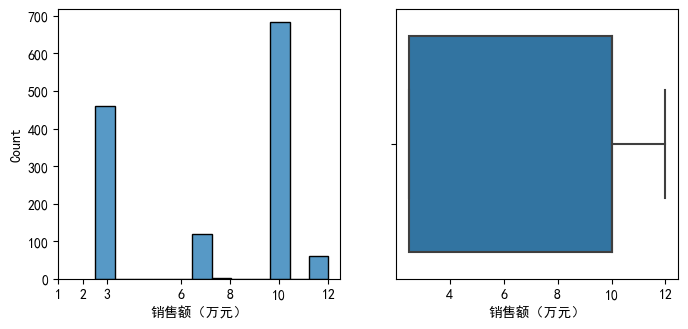

In [6]:
#销售额分布
plt.figure(figsize=(8,3.5))
plt.subplot(121)
g = sns.histplot(data=df,x="销售额（万元）")
g.set_xticks([1,2,3,6,8,10,12])
plt.subplot(122)
sns.boxplot(data=df,x="销售额（万元）")

In [7]:
set(df['销售月份'])

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September'}

In [8]:
#增加季季度列
def date_to_season(month):
    if month in('February','January','March'):
        return '一季度'
    elif month in('June','April','May'):
        return '二季度'
    elif month in('September','July','August'):
        return '三季度'
    else:
        return '四季度'
df['季度'] = df['销售月份'].apply(date_to_season)
df.head()

,商品代号,销售月份,销售点类型,销售额（万元）,季度
0,Tape 10,April,CBD店,2.5,二季度
1,Safety 8,August,社区店,10.0,三季度
2,Safety 2,February,社区店,10.0,一季度
3,Safety 8,November,社区店,10.0,四季度
4,Tape 10,October,社区店,2.5,四季度


In [9]:
import calendar
list(calendar.month_name).index('December')
df['月份num'] = pd.to_datetime(df['销售月份'],format='%B').dt.strftime('%m')
df.head()


,商品代号,销售月份,销售点类型,销售额（万元）,季度,月份num
0,Tape 10,April,CBD店,2.5,二季度,04
1,Safety 8,August,社区店,10.0,三季度,08
2,Safety 2,February,社区店,10.0,一季度,02
3,Safety 8,November,社区店,10.0,四季度,11
4,Tape 10,October,社区店,2.5,四季度,10


In [10]:
set(df['商品代号'])

{'Adhesive 1',
 'Adhesive 10',
 'Adhesive 2',
 'Adhesive 3',
 'Adhesive 4',
 'Adhesive 5',
 'Adhesive 6',
 'Adhesive 7',
 'Adhesive 8',
 'Adhesive 9',
 'Safety 1',
 'Safety 10',
 'Safety 2',
 'Safety 3',
 'Safety 4',
 'Safety 5',
 'Safety 6',
 'Safety 7',
 'Safety 8',
 'Safety 9',
 'Tape 1',
 'Tape 10',
 'Tape 2',
 'Tape 3',
 'Tape 4',
 'Tape 5',
 'Tape 6',
 'Tape 7',
 'Tape 8',
 'Tape 9'}

In [11]:
set(df['销售月份'])

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September'}

In [12]:
#添加商品类别列
def date_to_season(good):
    if good.startswith('Adhesive'):
        return 'Adhesive'
    elif good.startswith('Safety'):
        return 'Safety'
    else:
        return 'Tape'
df['商品类别'] = df['商品代号'].apply(date_to_season)
df.head()

,商品代号,销售月份,销售点类型,销售额（万元）,季度,月份num,商品类别
0,Tape 10,April,CBD店,2.5,二季度,04,Tape
1,Safety 8,August,社区店,10.0,三季度,08,Safety
2,Safety 2,February,社区店,10.0,一季度,02,Safety
3,Safety 8,November,社区店,10.0,四季度,11,Safety
4,Tape 10,October,社区店,2.5,四季度,10,Tape


In [14]:
df_month = df.groupby(['月份num'])['销售额（万元）'].sum().reset_index()

In [13]:
df_month_group = df.groupby(['商品类别','月份num'])['销售额（万元）'].sum().reset_index()
df_month_group.head()

,商品类别,月份num,销售额（万元）
0,Adhesive,01,56.0
1,Adhesive,02,84.0
2,Adhesive,03,105.0
3,Adhesive,04,63.0
4,Adhesive,05,63.0


In [14]:
df_month_group = df_month_group.pivot(index='月份num', columns='商品类别', values='销售额（万元）')

In [15]:
df_month_group.reset_index(inplace=True)


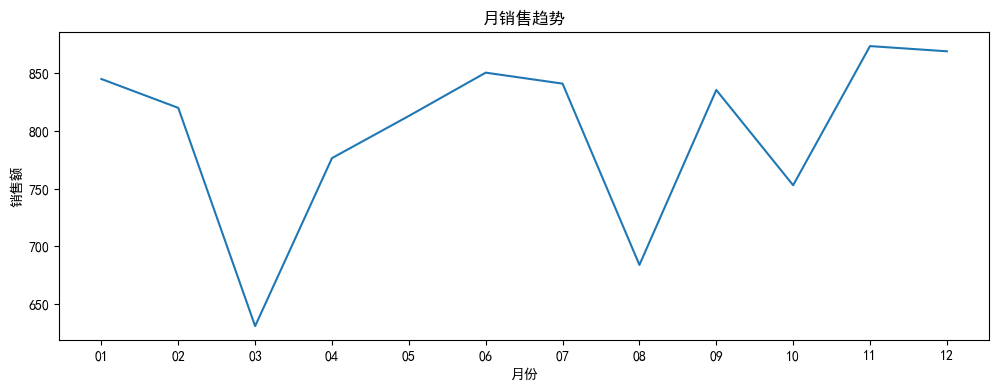

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df_month['月份num'],df_month['销售额（万元）'],)
plt.title('月销售趋势')
plt.xlabel('月份')
plt.ylabel('销售额')
plt.show()

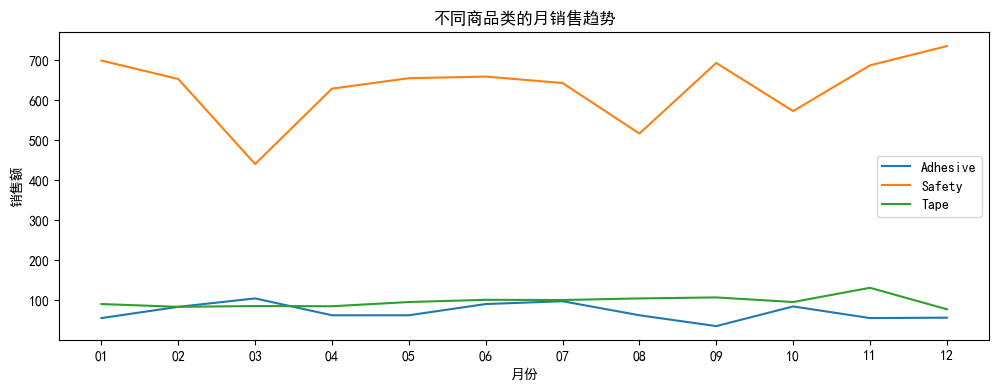

In [17]:
plt.figure(figsize=(12,4))
plt.plot(df_month_group['月份num'],df_month_group['Adhesive'],label = 'Adhesive')
plt.plot(df_month_group['月份num'],df_month_group['Safety'],label = 'Safety')
plt.plot(df_month_group['月份num'],df_month_group['Tape'],label = 'Tape')
# 设置图表标题和轴标签
plt.title('不同商品类的月销售趋势')
plt.xlabel('月份')
plt.ylabel('销售额')
plt.legend(loc=0)
plt.show()

In [18]:
df_good = df.groupby('商品类别')['销售额（万元）'].sum().reset_index()
df_good.sort_values('销售额（万元）',ascending=False,inplace=True)


In [19]:
#能显示原始数值和百分比的自定义函数
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(pct*total/100.0)
        # 同时显示数值和占比的饼图
        return '{p:.2f}%\n({v:})'.format(p=pct,v=val)
    return my_autopct

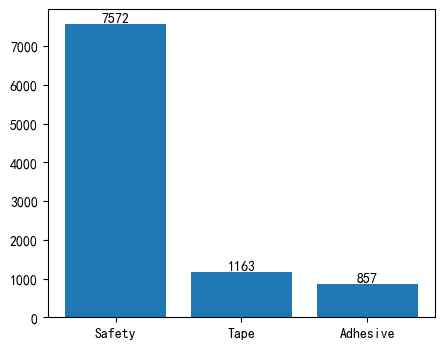

In [20]:
plt.figure(figsize=(5,4))
p1 = plt.bar(df_good['商品类别'],df_good['销售额（万元）'])
#增加数据标签
plt.bar_label(p1,label_type='edge')###################用这种方法的话就要给绘图命名p1,edge是标签位置
# for x,y1 in enumerate(df_good['销售额（万元）']):
#     plt.text(x,y1-y1/12,str(y1),fontsize=14,ha='center',va='bottom')
plt.show()

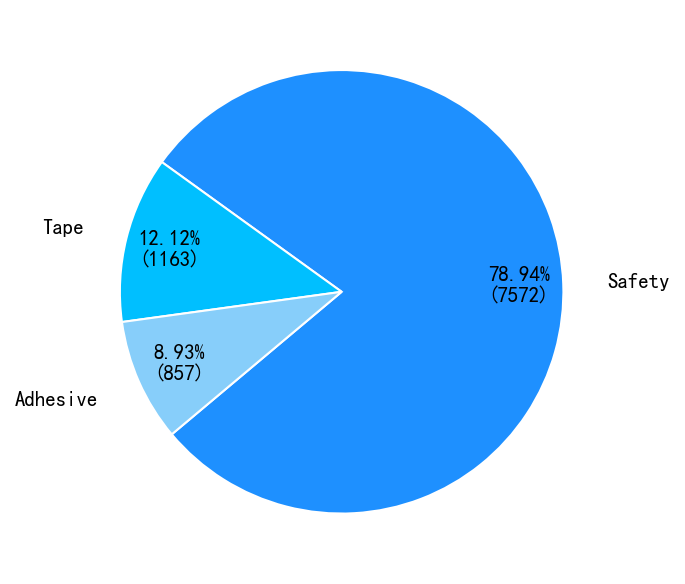

In [21]:
plt.figure(dpi=150)
plt.pie(df_good['销售额（万元）'],
        labels=df_good['商品类别'],
        startangle=-140,
        # explode=(0.01,0.01),
        # autopct='%.1f%%',
        # startangle=90,#旋转90度,
        autopct=make_autopct(df_good['销售额（万元）']),
        wedgeprops={'edgecolor': 'w'},
        colors=['#1E90FF','#00BFFF','#87CEFA'],
        labeldistance=1.2,#标签放在里面
        pctdistance=0.8,#百分比标签往里缩
        # textprops={'fontsize':12,'color':'w'},
        )
plt.show()

In [22]:
df_goodId = df.groupby('商品代号')['销售额（万元）'].sum().reset_index()
df_goodId.sort_values('销售额（万元）',ascending=True,inplace=True)
# plt.bar(x=0,height=0.5,bottom=df_goodId['商品代号'],width=df_goodId['销售额（万元）'])

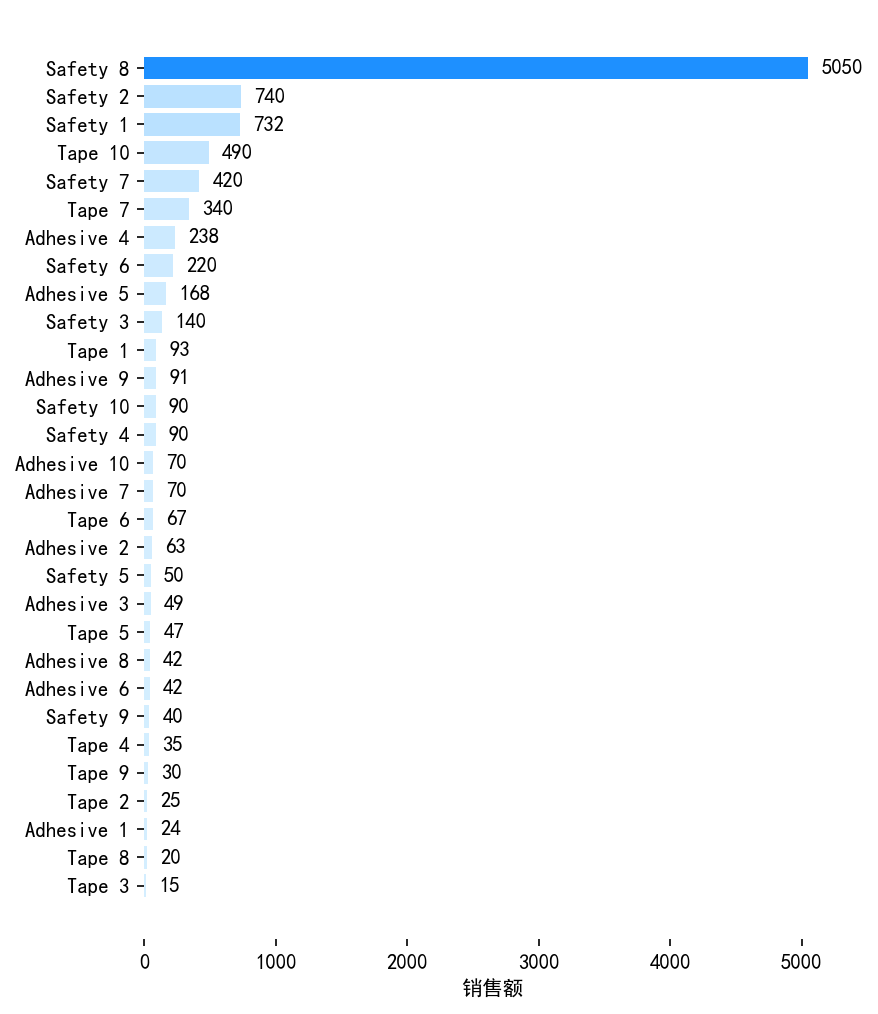

In [23]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
blue_colors = ['#D4EEFF', '#1E90FF']  # 淡蓝色到深蓝色
cmap = LinearSegmentedColormap.from_list('my_cmap', blue_colors)
norm = plt.Normalize(df_goodId['销售额（万元）'].min(), df_goodId['销售额（万元）'].max())
norm_y = norm(df_goodId['销售额（万元）'])
color = cmap(norm_y)  # 
plt.figure(figsize=(6,8),dpi=150)
ax=plt.gca() 
#设置图片的右边框和上边框为不显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.barh(df_goodId['商品代号'], df_goodId['销售额（万元）'],color=color)
for i, value in enumerate(df_goodId['销售额（万元）']):
    plt.text(value+100, i, str(int(value)), ha='left', va='center')
plt.xlabel('销售额')
plt.show()

In [24]:
df_season = df.groupby('季度')['销售额（万元）'].sum().reset_index()
df_season.sort_values('季度',inplace=True)

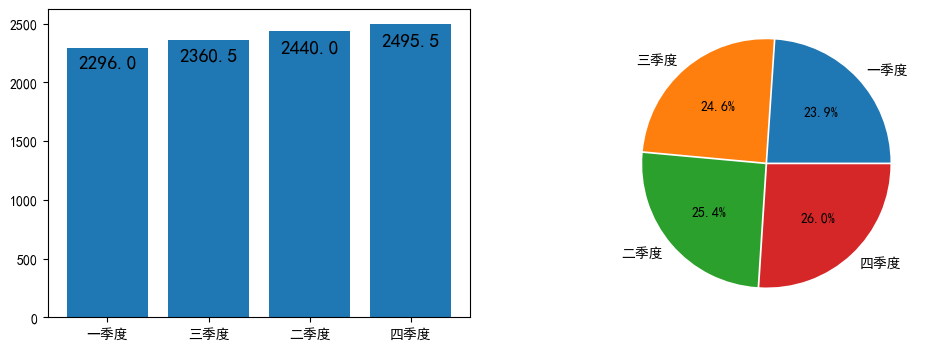

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(df_season['季度'],df_season['销售额（万元）'])
for x,y1 in enumerate(df_season['销售额（万元）']):
    plt.text(x,y1-y1/12,str(y1),fontsize=14,ha='center',va='bottom')
plt.subplot(122)
plt.pie(df_season['销售额（万元）'],
        labels=df_season['季度'],
        explode=(0.01,0.01,0.01,0.01),
        autopct='%.1f%%',)
plt.show()

In [26]:
# 不同销售点的销售金额
df_place = df.groupby('销售点类型')['销售额（万元）'].sum().reset_index()
df_place

,销售点类型,销售额（万元）
0,CBD店,4985.5
1,社区店,4606.5


In [27]:
#能显示原始数值和百分比的自定义函数
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        # 同时显示数值和占比的饼图
        return '{p:.2f}%\n({v:.1f})'.format(p=pct,v=val)
    return my_autopct

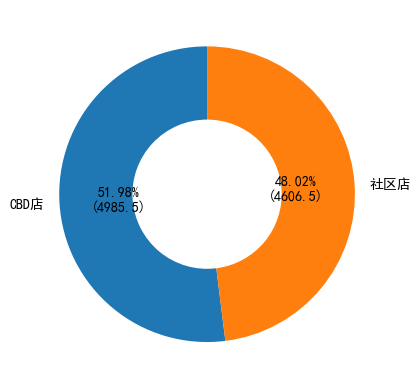

In [28]:
plt.pie(df_place['销售额（万元）'],
        labels=df_place['销售点类型'],
        startangle=90,
        # explode=(0.01,0.01),
        # autopct='%.1f%%',
        autopct=make_autopct(df_place['销售额（万元）'])
        )
plt.pie(df_place['销售额（万元）'],
        colors='w',
        startangle=90,
        radius=0.5,
        wedgeprops={'edgecolor': 'w'}
        )

plt.show()

In [29]:
df_place_month = pd.pivot_table(df,index='月份num',columns='销售点类型',values='销售额（万元）',aggfunc=sum).reset_index()
df_place_month


销售点类型,月份num,CBD店,社区店
0,01,482.0,363.0
1,02,363.0,457.0
2,03,299.0,332.0
3,04,407.0,369.5
4,05,408.5,404.5
5,06,400.5,450.0
6,07,446.0,395.0
7,08,372.5,311.5
8,09,446.5,389.0
9,10,394.0,359.0


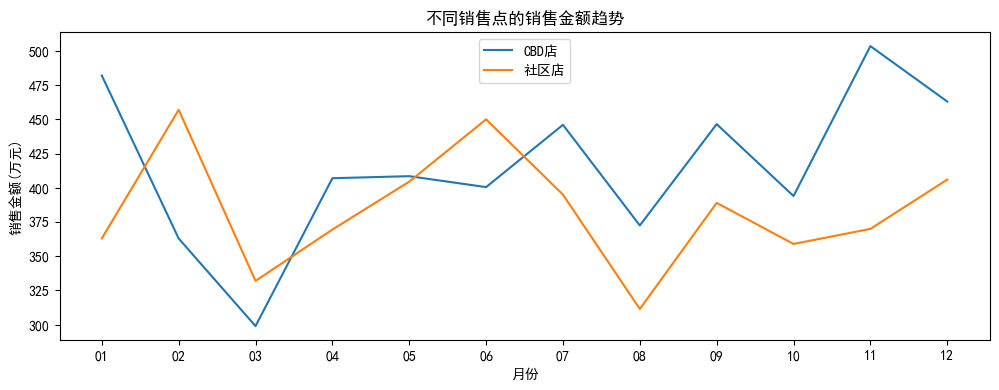

In [42]:
plt.figure(figsize=(12,4))
plt.plot(df_place_month['月份num'],df_place_month['CBD店'],label = 'CBD店')
plt.plot(df_place_month['月份num'],df_place_month['社区店'],label = '社区店')
# 设置图表标题和轴标签
plt.title('不同销售点的销售金额趋势')
plt.xlabel('月份')
plt.ylabel('销售金额(万元)')
plt.legend(loc=9)
# 显示图表
plt.show()

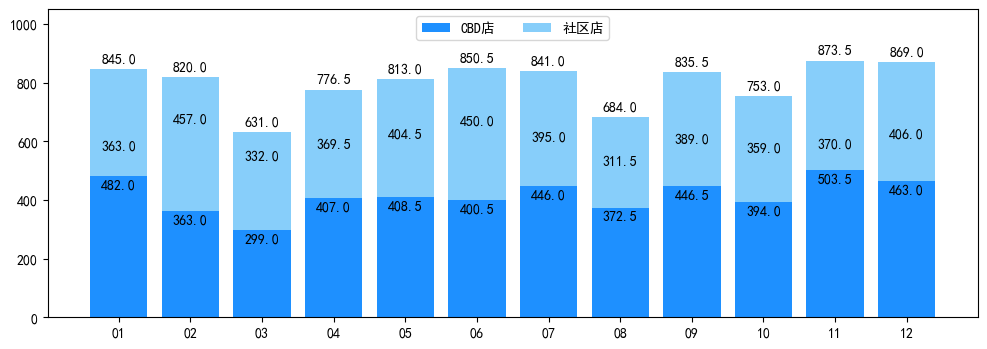

In [34]:
plt.figure(figsize=(12,4))
plt.bar(df_place_month['月份num'],df_place_month['CBD店'],color='#1E90FF',label="CBD店")
plt.bar(np.arange(len(df_place_month)),df_place_month['社区店'],bottom=df_place_month['CBD店'],color='#87CEFA',label="社区店")
plt.legend(loc=9,ncol=3)
# y轴刻度
plt.ylim([0,1050])
#加网格
# plt.grid()
#添加数据标签
for x1,y1 in enumerate(df_place_month['CBD店']):
    plt.text(x1,y1-50,str(y1),ha="center",va="bottom")
for x2,y2 in enumerate(df_place_month['社区店']+df_place_month['CBD店']):
    plt.text(x2,y2+15,str(y2),ha="center",va="bottom")
for x3,y3 in enumerate(df_place_month['社区店']):
    plt.text(x3,y3+200,str(y3),ha="center",va="bottom")
plt.show()

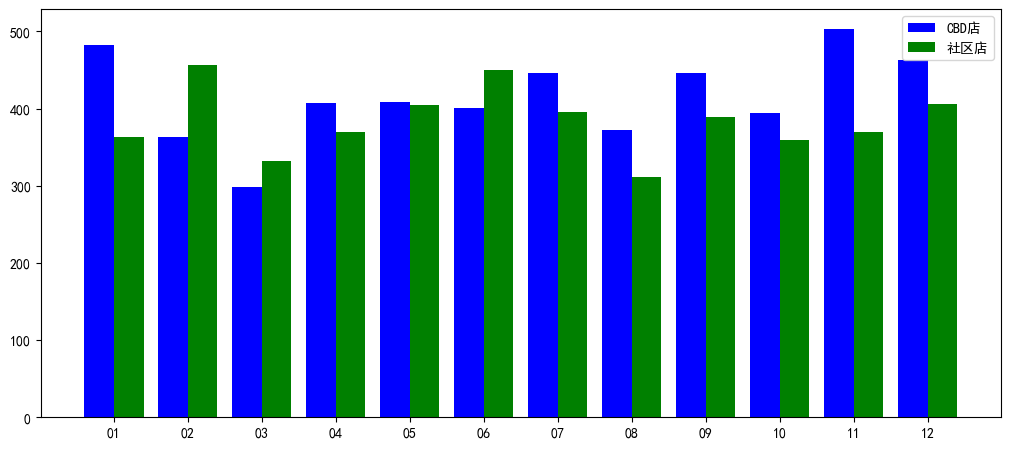

In [28]:
#分组
plt.figure(figsize=(12,6))
plt.bar(x=df_place_month["月份num"],height=df_place_month["CBD店"],color="blue",width=0.4,label="CBD店")
plt.bar(x=np.arange(len(df_place_month["月份num"]))+0.4,height=df_place_month["社区店"],color="g",width=0.4,label="社区店")
plt.legend(loc=0)

#增加数据标签
# for x,y1 in enumerate(df_place_month["CBD店"]):
#     plt.text(x,y1/2,str(y1),fontsize=16,ha='center',va='bottom')
# for x,y2 in enumerate(df_place_month["社区店"]):
#     plt.text(x+0.3,y2,str(y2),fontsize=16,ha='center',va='bottom',color='red')#x控制左右,y2控制上下

photo=plt.gcf()
photo.subplots_adjust(left=0.1,bottom=0.2)#调整图形上下左右边距的距离
plt.xticks(np.arange(12)+0.2)
plt.show()

In [29]:
ind = ['mean','std','min','max']
df_desc = df_place_month.describe().loc[ind,:]
df_desc

销售点类型,CBD店,社区店
mean,415.458333,383.875000
std,56.648621,42.818393
min,299.000000,311.500000
max,503.500000,457.000000


In [30]:
df_desc.reset_index(inplace=True)

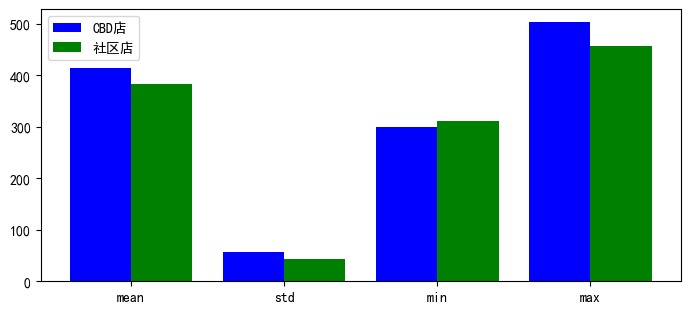

In [31]:
#分组
plt.figure(figsize=(8,4))
plt.bar(x=df_desc["index"],height=df_desc["CBD店"],color="blue",width=0.4,label="CBD店")
plt.bar(x=np.arange(len(df_desc["index"]))+0.4,height=df_desc["社区店"],color="g",width=0.4,label="社区店")
plt.legend(loc=0)

#增加数据标签
# for x,y1 in enumerate(df_place_month["CBD店"]):
#     plt.text(x,y1/2,str(y1),fontsize=16,ha='center',va='bottom')
# for x,y2 in enumerate(df_place_month["社区店"]):
#     plt.text(x+0.3,y2,str(y2),fontsize=16,ha='center',va='bottom',color='red')#x控制左右,y2控制上下

photo=plt.gcf()
photo.subplots_adjust(left=0.1,bottom=0.2)#调整图形上下左右边距的距离
plt.xticks(np.arange(4)+0.2)
plt.show()

In [32]:
# 不同销售点的不同商品的销售额对比
df_place_good = pd.pivot_table(df,index='商品代号',columns='销售点类型',values='销售额（万元）',aggfunc=sum).reset_index()
df_place_good.head()

销售点类型,商品代号,CBD店,社区店
0,Adhesive 1,8.0,16.0
1,Adhesive 10,21.0,49.0
2,Adhesive 2,42.0,21.0
3,Adhesive 3,28.0,21.0
4,Adhesive 4,112.0,126.0


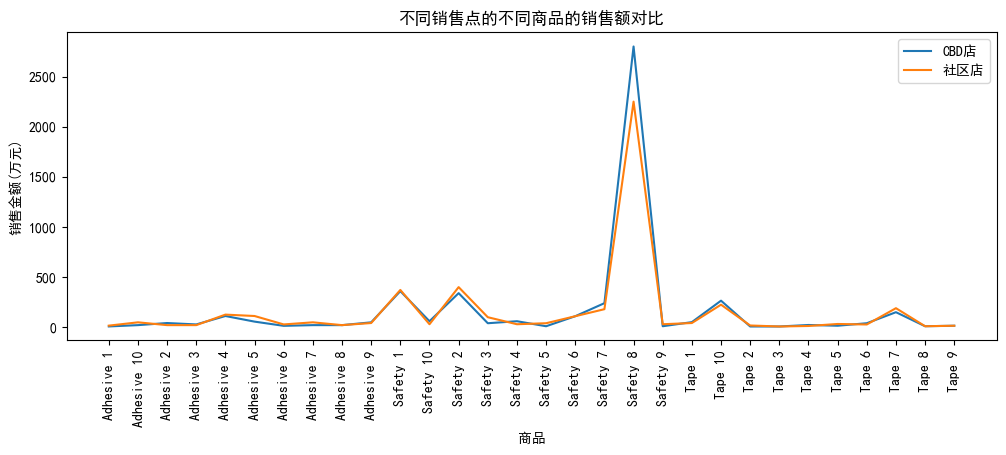

In [33]:
plt.figure(figsize=(12,4))
plt.plot(df_place_good['商品代号'],df_place_good['CBD店'],label = 'CBD店')
plt.plot(df_place_good['商品代号'],df_place_good['社区店'],label = '社区店')
# 设置图表标题和轴标签
plt.title('不同销售点的不同商品的销售额对比')
plt.xlabel('商品')
plt.ylabel('销售金额(万元)')
plt.legend(loc=0)
plt.xticks(rotation=90)
# 显示图表
plt.show()

In [44]:
df_season_good = pd.pivot_table(df,index='商品代号',columns='季度',values='销售额（万元）',aggfunc=sum).reset_index()
df_season_good.fillna(0,inplace=True)

In [55]:
df_season_good.set_index('商品代号',inplace=True)

In [68]:
df_season_good.sort_values('三季度',ascending=False)

季度,一季度,三季度,二季度,四季度
商品代号,,,,
Safety 8,1140.0,1280.0,1340.0,1290.0
Safety 2,240.0,180.0,150.0,170.0
Safety 1,180.0,120.0,180.0,252.0
Tape 10,127.5,117.5,135.0,110.0
Tape 7,65.0,102.5,67.5,105.0
Safety 7,100.0,100.0,90.0,130.0
Safety 3,20.0,50.0,40.0,30.0
Adhesive 4,84.0,49.0,70.0,35.0
Safety 6,60.0,40.0,60.0,60.0


In [57]:
df_season_good.columns

Index(['一季度', '三季度', '二季度', '四季度'], dtype='object', name='季度')

In [58]:
data = pd.DataFrame([],index=df_season_good.columns,columns=['滞销商品','畅销商品'])
for i in df_season_good.columns:
    data.loc[i,'滞销商品'] = list(df_season_good[i].sort_values().index[:5])
    data.loc[i,'畅销商品'] = list(df_season_good[i].sort_values().index[-5:])

In [59]:
data

,滞销商品,畅销商品
季度,,
一季度,"[Adhesive 1, Tape 3, Tape 8, Tape 2, Tape 9]","[Safety 7, Tape 10, Safety 1, Safety 2, Safety 8]"
三季度,"[Safety 9, Tape 3, Tape 2, Tape 8, Adhesive 6]","[Tape 7, Tape 10, Safety 1, Safety 2, Safety 8]"
二季度,"[Adhesive 1, Tape 9, Tape 8, Adhesive 3, Adhes...","[Safety 7, Tape 10, Safety 2, Safety 1, Safety 8]"
四季度,"[Adhesive 3, Tape 3, Safety 5, Tape 2, Tape 4]","[Tape 10, Safety 7, Safety 2, Safety 1, Safety 8]"
